##### **Name - Surname:** Ramazan Serhat Uygun
##### **Number:** 201401049

# **Question 3**

___

## **Regression Model’s**

## Required Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Loading the Dataset and Initial Exploration

In [19]:
file_path = 'diamonds.csv'  
diamonds = pd.read_csv(file_path)

print(diamonds.info())
print(diamonds.head())
print(diamonds.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9 

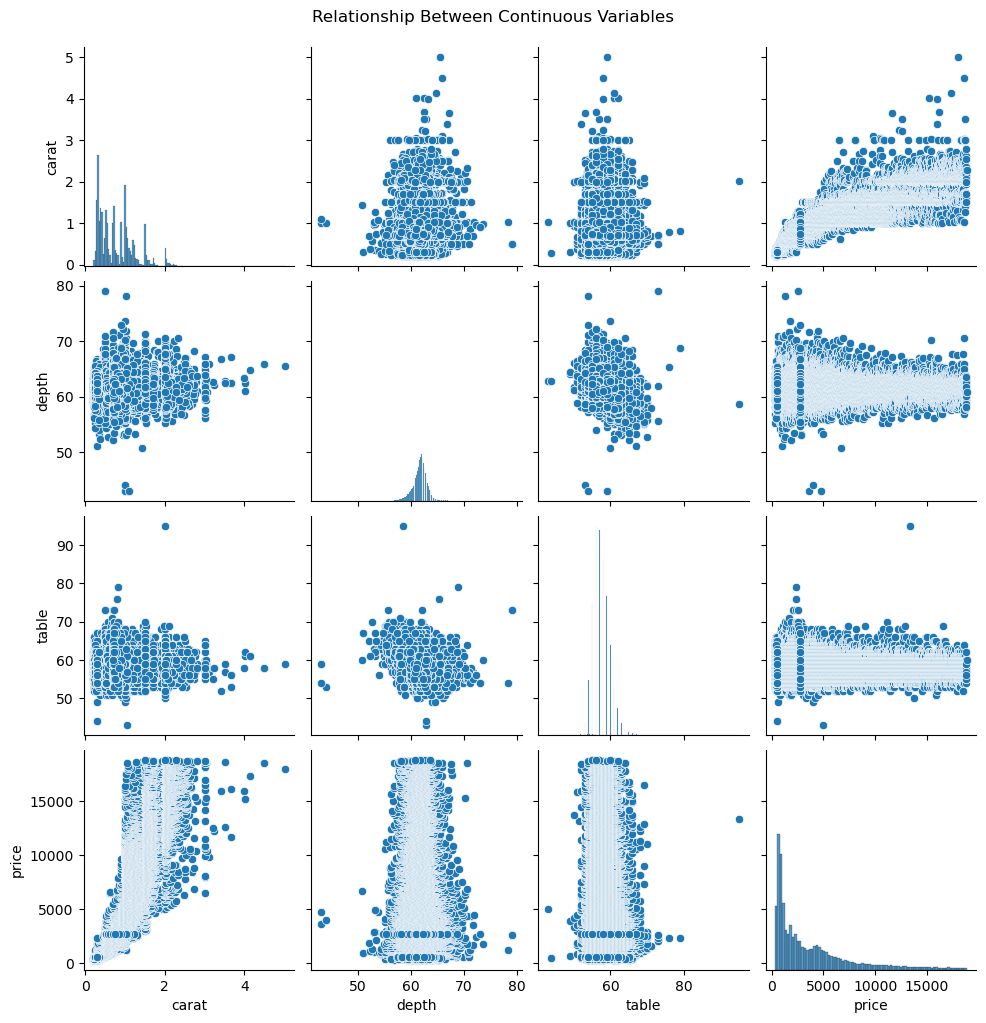

In [21]:
sns.pairplot(diamonds, vars=['carat', 'depth', 'table', 'price'])
plt.suptitle("Relationship Between Continuous Variables", y=1.02)
plt.show()

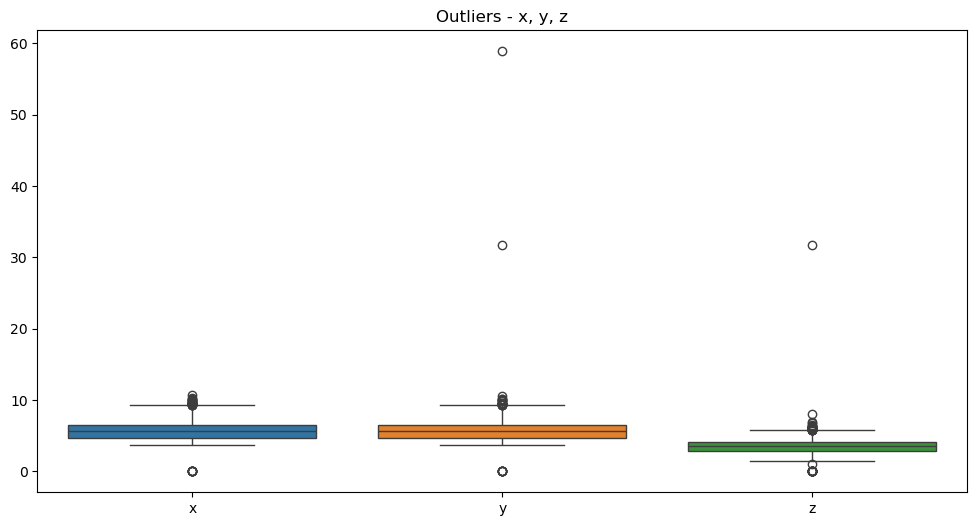

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=diamonds[['x', 'y', 'z']])
plt.title("Outliers - x, y, z")
plt.show()

## Cleaning Outliers

In [26]:
diamonds_cleaned = diamonds[(diamonds['x'] > 0) & (diamonds['y'] > 0) & (diamonds['z'] > 0)]
print(diamonds_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53920 non-null  int64  
 1   carat       53920 non-null  float64
 2   cut         53920 non-null  object 
 3   color       53920 non-null  object 
 4   clarity     53920 non-null  object 
 5   depth       53920 non-null  float64
 6   table       53920 non-null  float64
 7   price       53920 non-null  int64  
 8   x           53920 non-null  float64
 9   y           53920 non-null  float64
 10  z           53920 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB
None


## Transformation of Categorical Variables

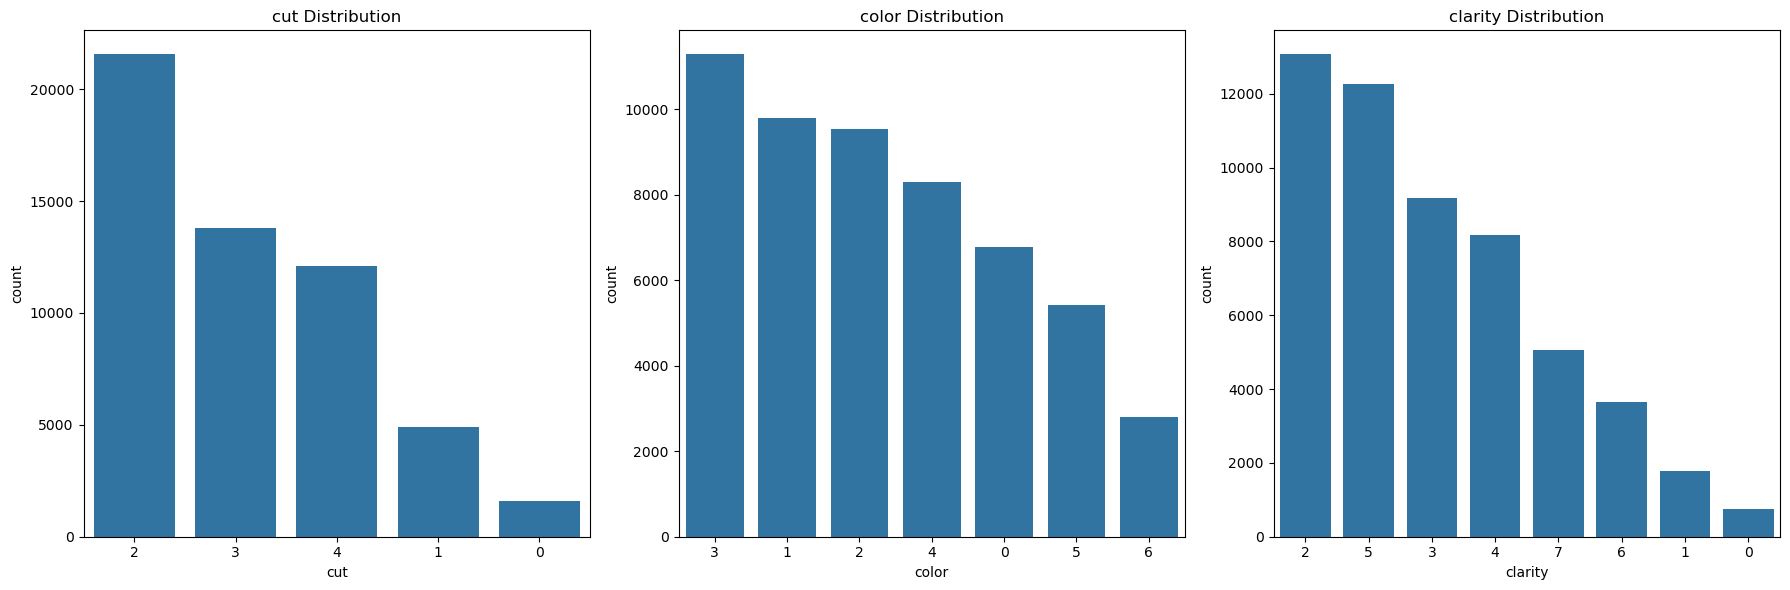

In [36]:
label_encoders = {}
categorical_columns = ['cut', 'color', 'clarity']

for col in categorical_columns:
    le = LabelEncoder()
    diamonds_cleaned.loc[:, col] = le.fit_transform(diamonds_cleaned[col])  # .loc kullanımı
    label_encoders[col] = le

plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=diamonds_cleaned, x=col, order=diamonds_cleaned[col].value_counts().index)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

## Standardization

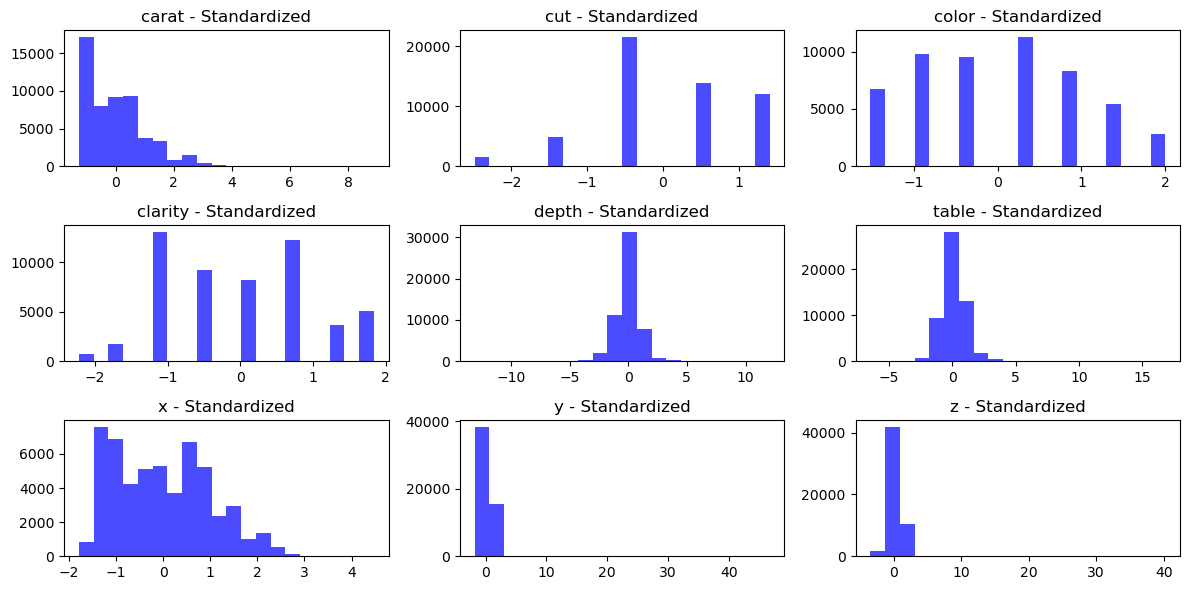

In [53]:
features = diamonds_cleaned.drop(['price', 'Unnamed: 0'], axis=1)
target = diamonds_cleaned['price']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

num_columns = len(features.columns)
num_rows = math.ceil(num_columns / 3) 

plt.figure(figsize=(12, 6))
for i, col in enumerate(features.columns, 1):
    plt.subplot(num_rows, 3, i) 
    plt.hist(features_scaled_df[col], bins=20, color='blue', alpha=0.7)
    plt.title(f"{col} - Standardized")
plt.tight_layout()
plt.show()

## Normalization

      carat   cut     color   clarity     depth     table         x         y  \
0  0.006237  0.50  0.166667  0.428571  0.513889  0.230769  0.031384  0.005433   
1  0.002079  0.75  0.166667  0.285714  0.466667  0.346154  0.022825  0.002898   
2  0.006237  0.25  0.166667  0.571429  0.386111  0.423077  0.045649  0.007063   
3  0.018711  0.75  0.833333  0.714286  0.538889  0.288462  0.067047  0.009960   
4  0.022869  0.25  1.000000  0.428571  0.563889  0.288462  0.087019  0.012133   

          z  
0  0.044256  
1  0.040351  
2  0.040351  
3  0.050765  
4  0.054670  


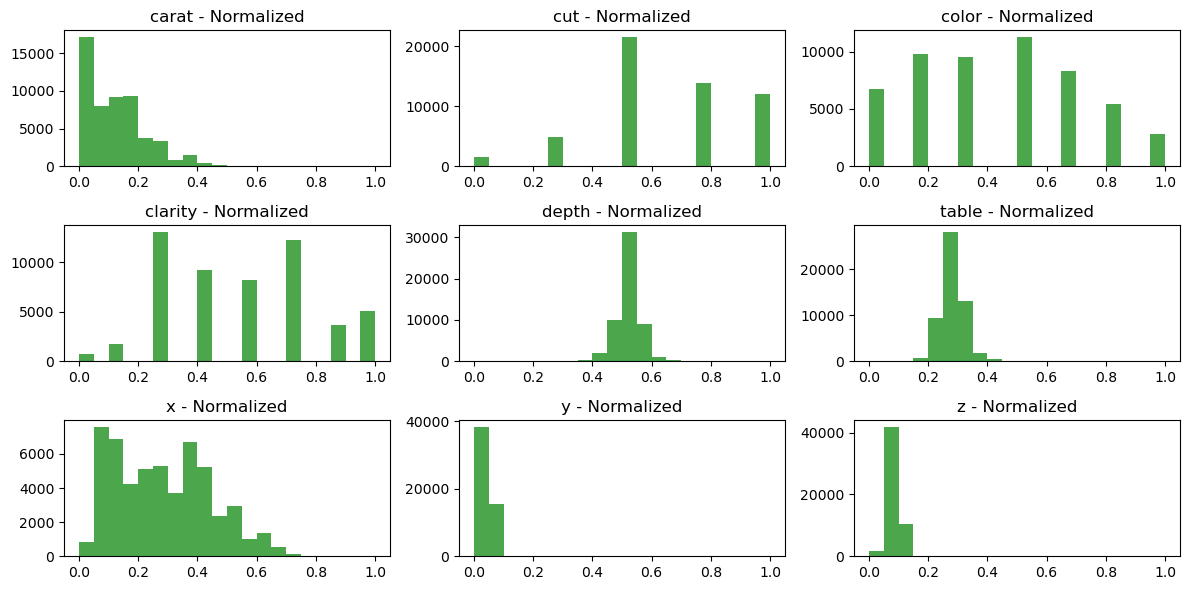

In [75]:
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
features_normalized_df = pd.DataFrame(features_normalized, columns=features.columns)

print(features_normalized_df.head())

plt.figure(figsize=(12, 6))
for i, col in enumerate(features.columns, 1):
    plt.subplot(math.ceil(len(features.columns) / 3), 3, i)
    plt.hist(features_normalized_df[col], bins=20, color='green', alpha=0.7)
    plt.title(f"{col} - Normalized")
plt.tight_layout()
plt.show()

## Modeling and Performance Comparison

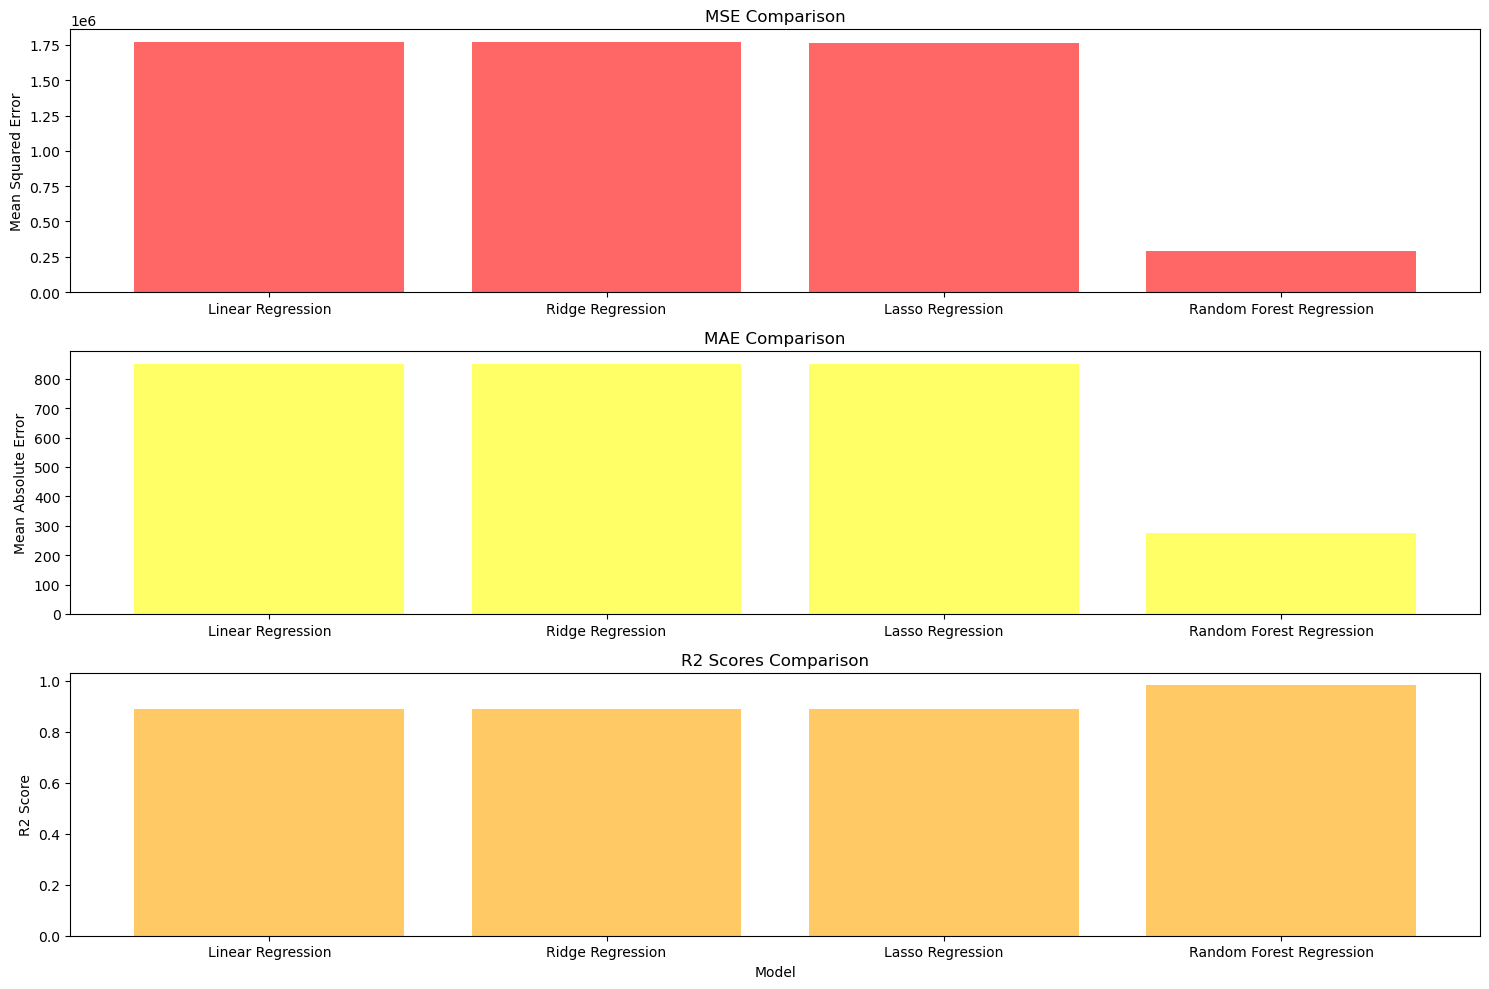

In [155]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, target, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.5, max_iter=5000), 
    "Random Forest Regression": RandomForestRegressor(n_estimators=10, random_state=42)
}

results = {"Model": [], "MSE": [], "MAE": [], "R2": []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results["Model"].append(name)
    results["MSE"].append(mse)
    results["MAE"].append(mae)
    results["R2"].append(r2)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.bar(results["Model"], results["MSE"], color='red', alpha=0.6)
plt.title("MSE Comparison")
plt.ylabel("Mean Squared Error")

plt.subplot(3, 1, 2)
plt.bar(results["Model"], results["MAE"], color='yellow', alpha=0.6)
plt.title("MAE Comparison")
plt.ylabel("Mean Absolute Error")

plt.subplot(3, 1, 3)
plt.bar(results["Model"], results["R2"], color='orange', alpha=0.6)
plt.title("R2 Scores Comparison")
plt.ylabel("R2 Score")
plt.xlabel("Model")

plt.tight_layout()
plt.show()

## Importance Score of Features

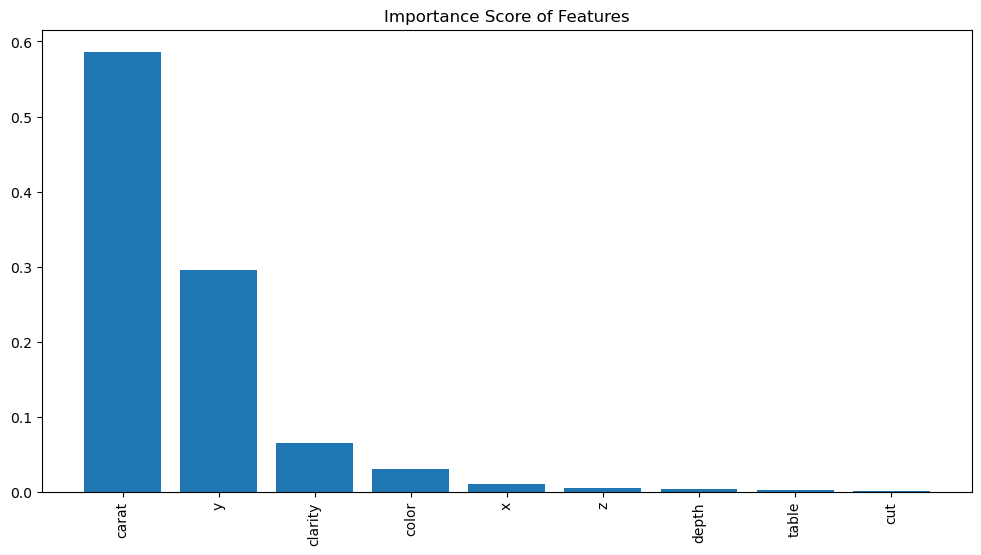

In [67]:
importances = models["Random Forest Regression"].feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(features.columns)), importances[sorted_indices], align='center')
plt.xticks(range(len(features.columns)), features.columns[sorted_indices], rotation=90)
plt.title("Importance Score of Features")
plt.show()

## Hyperparameter Optimization for All Models

### 1. GridSearchCV for Ridge and Lasso

In [153]:
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

ridge_model = Ridge()
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search_ridge.fit(X_train, y_train)

ridge_best_model = grid_search_ridge.best_estimator_
ridge_pred = ridge_best_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

print("Best Ridge parameters:", grid_search_ridge.best_params_)
print("Ridge - Best R2 score:", grid_search_ridge.best_score_)
print(f"Ridge - MSE: {ridge_mse:.2f}")
print(f"Ridge - MAE: {ridge_mae:.2f}")

lasso_model = Lasso(max_iter=5000)
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search_lasso.fit(X_train, y_train)

lasso_best_model = grid_search_lasso.best_estimator_
lasso_pred = lasso_best_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

print("Best Lasso parameters:", grid_search_lasso.best_params_)
print("Lasso - Best R2 score:", grid_search_lasso.best_score_)
print(f"Lasso - MSE: {lasso_mse:.2f}")
print(f"Lasso - MAE: {lasso_mae:.2f}")

Best Ridge parameters: {'alpha': 10.0}
Ridge - Best R2 score: 0.8691263120882231
Ridge - MSE: 1770761.04
Ridge - MAE: 852.16
Best Lasso parameters: {'alpha': 5.0}
Lasso - Best R2 score: 0.8830429896665555
Lasso - MSE: 1735591.06
Lasso - MAE: 856.83


### 2. RandomizedSearchCV for Random Forest

In [147]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

ridge_pred = grid_search_ridge.best_estimator_.predict(X_test)
lasso_pred = grid_search_lasso.best_estimator_.predict(X_test)
rf_pred = random_search_rf.best_estimator_.predict(X_test)

optimized_results = {
    "Model": ["Linear Regression", "Ridge", "Lasso", "Random Forest"],
    "Best Parameters": [
        None, 
        grid_search_ridge.best_params_,
        grid_search_lasso.best_params_,
        random_search_rf.best_params_
    ],
    "MSE": [
        mean_squared_error(y_test, linear_pred),
        mean_squared_error(y_test, ridge_pred),
        mean_squared_error(y_test, lasso_pred),
        mean_squared_error(y_test, rf_pred)
    ],
    "MAE": [
        mean_absolute_error(y_test, linear_pred),
        mean_absolute_error(y_test, ridge_pred),
        mean_absolute_error(y_test, lasso_pred),
        mean_absolute_error(y_test, rf_pred)
    ],
    "R2 Score": [
        r2_score(y_test, linear_pred),
        r2_score(y_test, ridge_pred),
        r2_score(y_test, lasso_pred),
        r2_score(y_test, rf_pred)
    ]
}

results_df = pd.DataFrame(optimized_results)
print(results_df)

               Model                                    Best Parameters  \
0  Linear Regression                                               None   
1              Ridge                                    {'alpha': 10.0}   
2              Lasso                                     {'alpha': 5.0}   
3      Random Forest  {'n_estimators': 200, 'min_samples_split': 5, ...   

            MSE         MAE  R2 Score  
0  1.771668e+06  851.209989  0.889491  
1  1.770761e+06  852.160308  0.889548  
2  1.735591e+06  856.825580  0.891742  
3  2.689441e+05  261.737651  0.983224  


## Visualizing Results

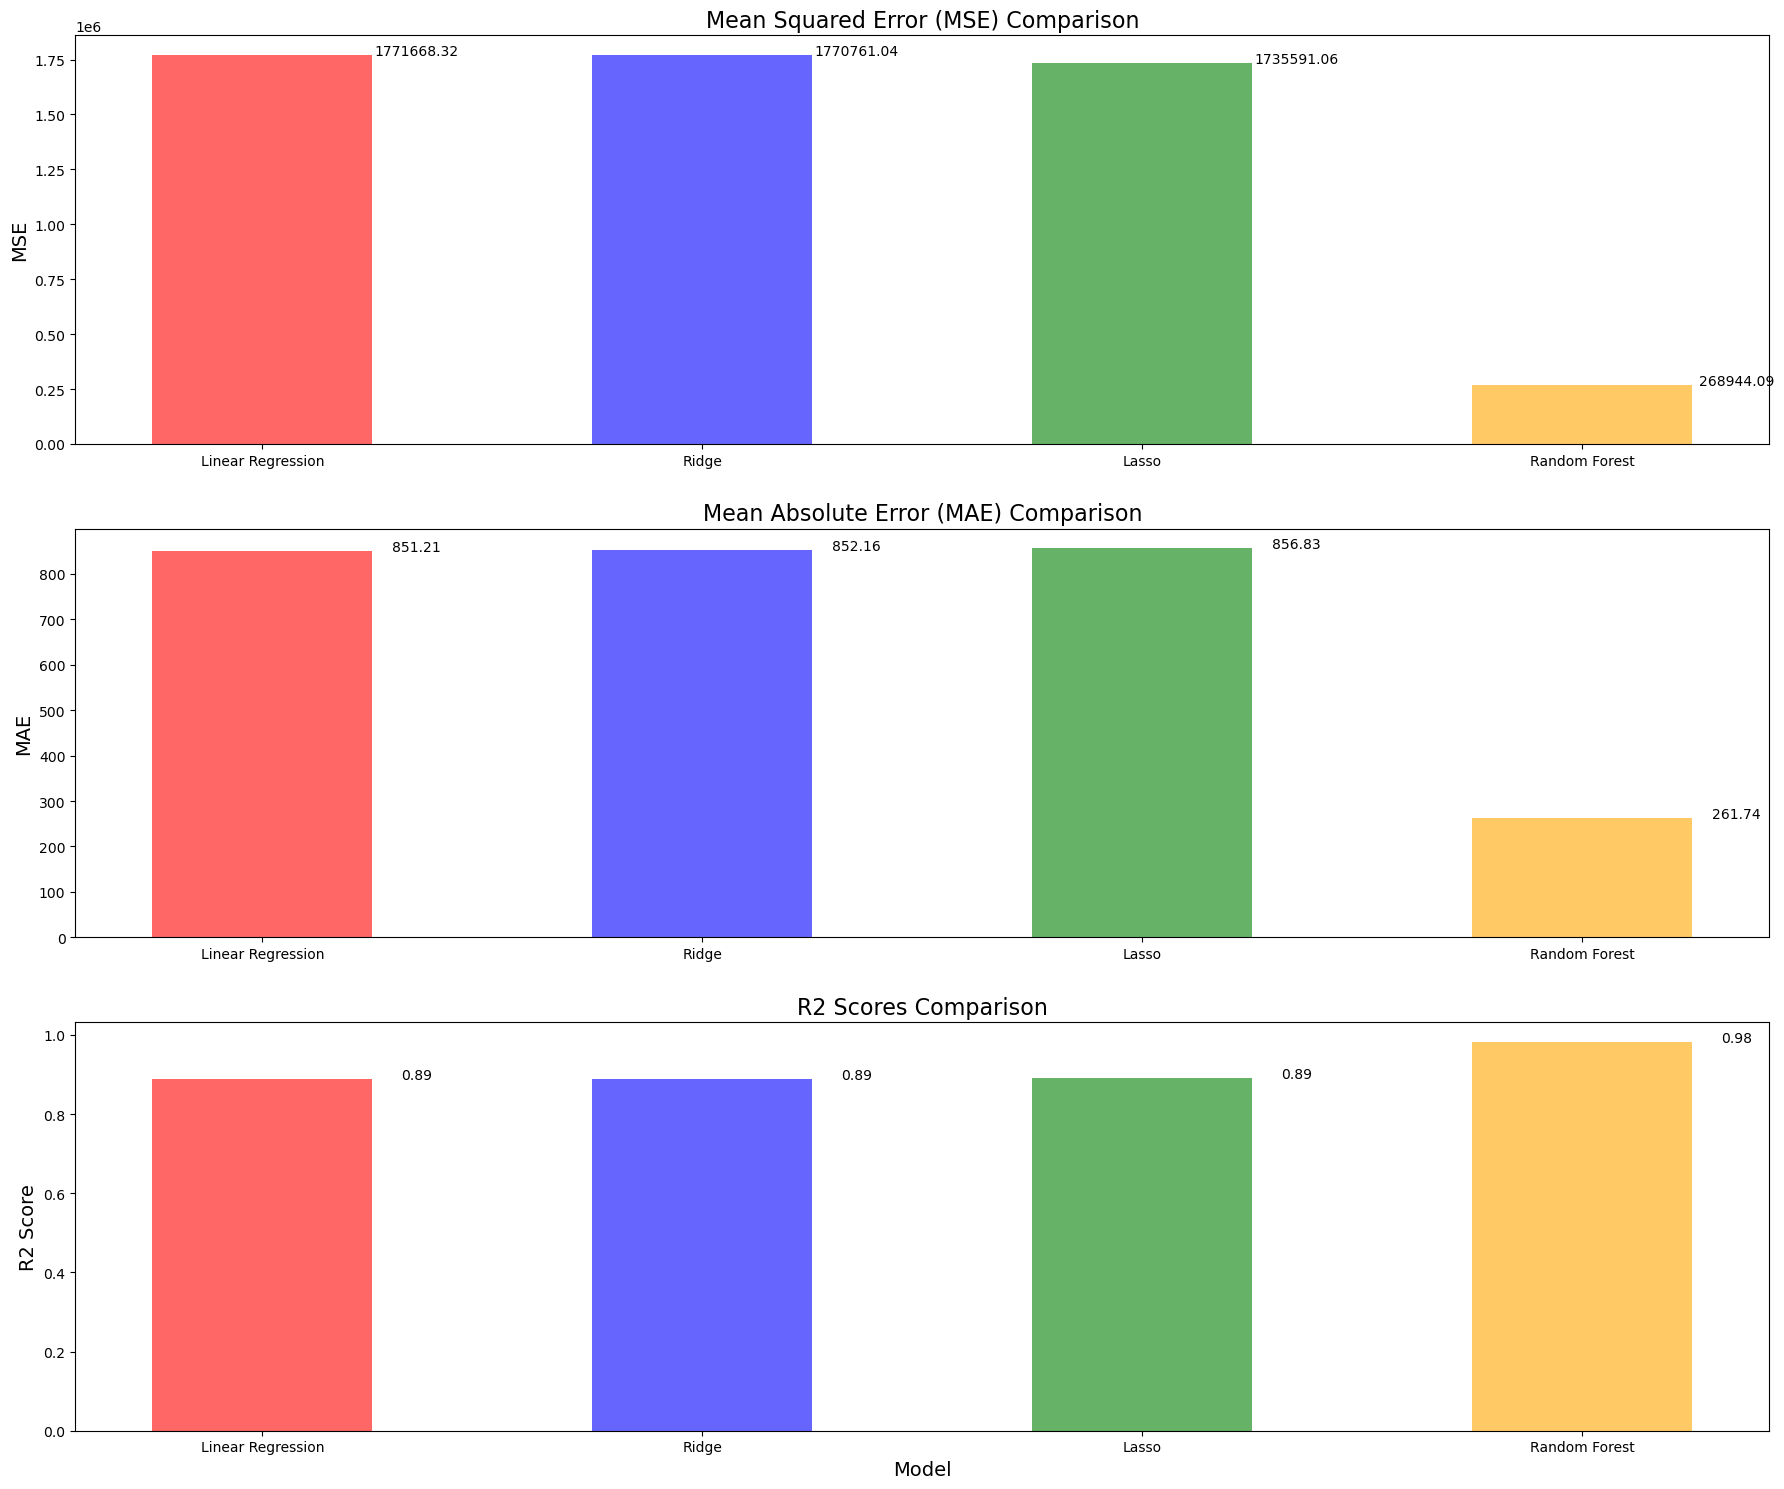

In [161]:
plt.figure(figsize=(18, 15))

plt.subplot(3, 1, 1)
bars1 = plt.bar(results_df["Model"], results_df["MSE"], color=['red', 'blue', 'green', 'orange'], alpha=0.6, width=0.5)
plt.title("Mean Squared Error (MSE) Comparison", fontsize=16)
plt.ylabel("MSE", fontsize=14)
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() + 0.1, yval, f"{yval:.2f}", ha='center', fontsize=10, rotation=0)

plt.subplot(3, 1, 2)
bars2 = plt.bar(results_df["Model"], results_df["MAE"], color=['red', 'blue', 'green', 'orange'], alpha=0.6, width=0.5)
plt.title("Mean Absolute Error (MAE) Comparison", fontsize=16)
plt.ylabel("MAE", fontsize=14)
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() + 0.1, yval, f"{yval:.2f}", ha='center', fontsize=10, rotation=0)

plt.subplot(3, 1, 3)
bars3 = plt.bar(results_df["Model"], results_df["R2 Score"], color=['red', 'blue', 'green', 'orange'], alpha=0.6, width=0.5)
plt.title("R2 Scores Comparison", fontsize=16)
plt.ylabel("R2 Score", fontsize=14)
plt.xlabel("Model", fontsize=14)
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() + 0.1, yval, f"{yval:.2f}", ha='center', fontsize=10, rotation=0)

plt.tight_layout(h_pad=2.5)
plt.show()